In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tables
import mplfinance as mpf
import my_afml_fncs as my_afml
from my_afml_fncs import dropLabels
from research import drop_label
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


Num of CPU core:  128
Machine info:  Linux-6.8.0-52-generic-x86_64-with-glibc2.39
Python 3.10.16 (main, Dec 11 2024, 16:24:50) [GCC 11.2.0]
Numpy 1.26.4
Pandas 2.2.3


In [2]:
volume_bars_df = pd.read_hdf("tick_data/bars/volume_bars.h5", key="volume_bars")
# volume_bars_df.head()

In [3]:
volume_bars_df['time']=pd.to_datetime(volume_bars_df['time'])
volume_bars_df.set_index('time',inplace=True)
# vol=my_afml.get_daily_volatility(volume_bars_df.close)

In [4]:
vol=my_afml.getDailyVol(volume_bars_df.close)
vol.mean()

0.0037081056391128505

In [5]:
es_cusum_events=my_afml.getTEvents(volume_bars_df.close,vol.mean())

In [6]:
es_cusum_events.shape

(48,)

In [7]:

t1=my_afml.getVb(volume_bars_df.close,es_cusum_events)
# t1

In [8]:
ptsl=[1,1]
trgt=vol.mean()*volume_bars_df.close
minRet=0.00003
numThread=1
trigger=my_afml.getEvents(volume_bars_df.close,es_cusum_events,ptsl,trgt,minRet,numThread,t1)
# print(trigger)
# print(trigger.shape)

Running processJobs_


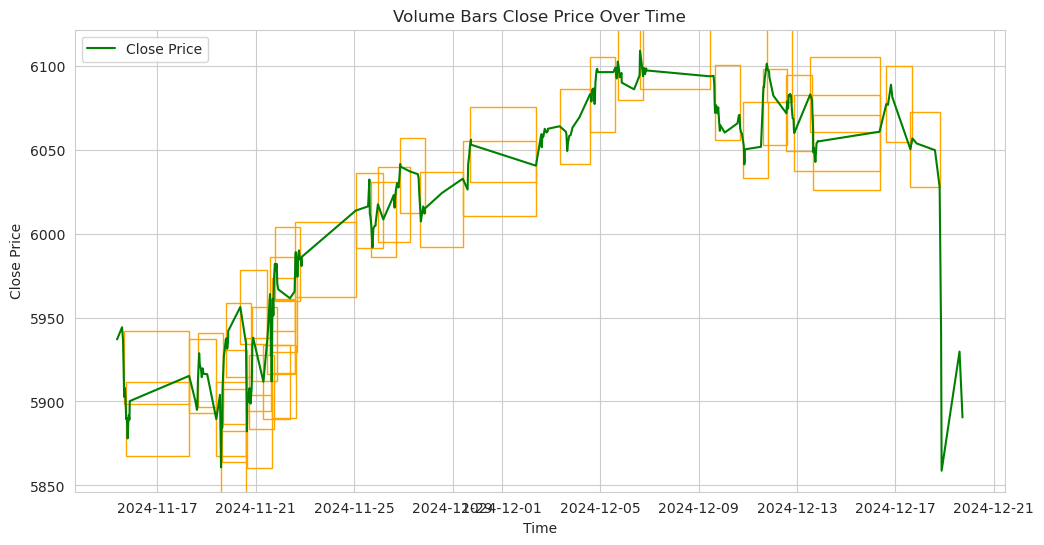

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=volume_bars_df.index, y='close', data=volume_bars_df, label='Close Price', color='green')

for start, t1, trgt in trigger.itertuples():
    box = Rectangle((start, volume_bars_df.close.loc[start] - vol.mean()*volume_bars_df.close.loc[start]), t1-start, 2*vol.mean()*volume_bars_df.close.loc[start],
                linewidth=1, edgecolor='orange', facecolor='none', label='Selected Area')
    plt.gca().add_patch(box)


plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Volume Bars Close Price Over Time')
# plt.legend()
plt.grid(True)
plt.show()



In [10]:
bins=my_afml.getBins(trigger,volume_bars_df.close)
# print(bins)
# print(bins.shape)

In [11]:
post_drop_bins=dropLabels(bins)

In [12]:
# Define moving average windows
short_window = 50  # e.g., 50 periods
long_window = 200  # e.g., 200 periods


In [13]:
events=my_afml.movingAverageCrossover(volume_bars_df.close,short_window,long_window)

In [14]:
t1=my_afml.getVb(volume_bars_df.close,events)

In [18]:
ptsl=[1,2]
trgt=vol.mean()*volume_bars_df.close
minRet=0.00003
numThread=24
trigger=my_afml.getEvents(volume_bars_df.close,events,ptsl,trgt,minRet,numThread,t1)
# print(trigger)
# print(trigger.shape)

Running processJobs


2025-02-07 21:01:06.707179 100.0% applyPtSlOnT1 done after 0.0 minutes. Remaining 0.0 minutes.


In [20]:
trigger

,t1,trgt
time,,
2024-11-15 08:39:56.469400,2024-11-18 06:58:08.108243,22.015023
2024-11-15 13:33:55.913324,2024-11-18 06:58:08.108243,22.041907
2024-11-15 14:30:17.843538,2024-11-18 06:58:08.108243,22.014096
2024-11-15 14:43:36.170628,2024-11-18 06:58:08.108243,21.989066
2024-11-15 15:02:28.997004,2024-11-18 06:58:08.108243,21.952912
...,...,...
2024-12-18 19:08:29.806640,NaT,22.351534
2024-12-18 20:33:00.914784,NaT,22.027075
2024-12-18 21:03:19.567693,NaT,21.724864


In [21]:
bins=my_afml.getBins(trigger,volume_bars_df.close)

In [22]:
bins

,ret,bin
time,,
2024-11-15 08:39:56.469400,-0.003663,-1.0
2024-11-15 13:33:55.913324,-0.004879,-1.0
2024-11-15 14:30:17.843538,-0.003622,-1.0
2024-11-15 14:43:36.170628,-0.002487,-1.0
2024-11-15 15:02:28.997004,-0.000845,-1.0
...,...,...
2024-12-16 20:59:59.504389,-0.005180,-1.0
2024-12-17 14:38:13.296365,-0.003719,-1.0
2024-12-17 16:31:24.270556,-0.004788,-1.0


In [23]:
post_drop_bins=dropLabels(bins)

dropped label 2 0.0038461538461538464


In [24]:
post_drop_bins

,ret,bin
time,,
2024-11-15 08:39:56.469400,-0.003663,-1.0
2024-11-15 13:33:55.913324,-0.004879,-1.0
2024-11-15 14:30:17.843538,-0.003622,-1.0
2024-11-15 14:43:36.170628,-0.002487,-1.0
2024-11-15 15:02:28.997004,-0.000845,-1.0
...,...,...
2024-12-16 20:59:59.504389,-0.005180,-1.0
2024-12-17 14:38:13.296365,-0.003719,-1.0
2024-12-17 16:31:24.270556,-0.004788,-1.0
